<div style="background-color:#2E87A4 ;color:#FDFDFD;padding:20px;border:1px solid #3184BB;text-align:center;">
<p><font size="14" color="#FDFDFD" face="Lora"><i>Hackathon(Dataset Analysis)</i></font> </p>
</div>

# Problem Statement :

* Given the input feature predict the output feature using the best model

# Task

* Prepare the data and build a model to predict the output given the input feature

## Step 1: Load the data and perform the basic EDA to understand the data.

In [2]:
# import required libraries

import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from IPython.core.interactiveshell import InteractiveShell 
InteractiveShell.ast_node_interactivity = 'all'

import warnings
warnings.filterwarnings('ignore')

%config InlineBackend.figure_format='retina'

In [21]:
Hack = pd.read_csv(r"C:\hackethon\dataframe_.csv")

In [22]:
Hack.head()

,input,output
0,-122.740667,-130.572085
1,-121.531419,-129.938929
2,-134.917019,-130.141832
3,-120.605951,-125.760932
4,-129.894781,-112.785214


In [23]:
Hack.tail()

,input,output
1692,25.410184,-76.380902
1693,29.537304,-82.796934
1694,31.633331,-87.000000
1695,29.091458,-104.943052
1696,17.145296,-101.726894


In [24]:
# Check for any corrupted data or Wrong datatype:
Hack.info() # As we can see that the datatypes are correct, so there is no corrupted data in our dataset.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1697 entries, 0 to 1696
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   input   1696 non-null   float64
 1   output  1696 non-null   float64
dtypes: float64(2)
memory usage: 26.6 KB


In [25]:
Hack.dtypes

input     float64
output    float64
dtype: object

In [26]:
Hack.describe()

,input,output
count,1696.000000,1696.000000
mean,1.159933,-34.088017
std,79.005970,65.771112
min,-134.962839,-132.422167
25%,-63.386506,-80.026767
50%,10.195194,-50.470981
75%,70.264109,-11.000000
max,134.605775,134.425495


## Step 2 :  Perform proper analysis of the dataset and draw conclusions based on your analysis.


In [ ]:
# Check for duplicates 

In [27]:
Hack.duplicated()
Hack.duplicated().value_counts() # wecan see that there are duplicates

0       False
1       False
2       False
3       False
4       False
        ...  
1692     True
1693     True
1694     True
1695     True
1696     True
Length: 1697, dtype: bool

False    1091
True      606
dtype: int64

In [28]:
Hack[Hack.duplicated()] # view the duplicates

,input,output
106,-63.366669,-33.000000
464,112.633331,103.000000
715,-31.366669,-49.000000
819,-117.366669,-75.000000
865,-131.366669,-125.000000
...,...,...
1692,25.410184,-76.380902
1693,29.537304,-82.796934
1694,31.633331,-87.000000
1695,29.091458,-104.943052


In [29]:
Hack.drop_duplicates(keep = 'first', inplace = True) # drop the duplicates

In [30]:
Hack.duplicated().value_counts()

False    1091
dtype: int64

In [34]:
Hack

,input,output
0,-122.740667,-130.572085
1,-121.531419,-129.938929
2,-134.917019,-130.141832
3,-120.605951,-125.760932
4,-129.894781,-112.785214
...,...,...
1107,-119.954237,123.609122
1108,-109.942155,127.197394
1109,-111.515368,128.170885
1110,-110.344221,123.087950


# Identify the missing values

In [36]:
Hack.isna()# `NaN` reprents the missing values -- Not a number
Hack.isna().sum() # We can observe that there are missing values in `input` , `output`.

,input,output
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
...,...,...
1107,False,False
1108,False,False
1109,False,False
1110,False,False


input     1
output    1
dtype: int64

In [38]:
Hack[Hack.input.isna()]# view the missing values

,input,output
1439,NaN,NaN


In [39]:
Hack[Hack.output.isna()]# vew the missing the values

,input,output
1439,NaN,NaN


# Filling the missing values with median

In [42]:
median = Hack.input.median() # calculating the median for input
median

17.462087345

In [43]:
Hack.input.fillna(median, inplace = True) # filling with median in input

In [44]:
median1 = Hack.output.median() # calculating the median for output

In [45]:
Hack.output.fillna(median1, inplace =True)  # filling with median in output

In [47]:
Hack[Hack.input.isna()]

,input,output


In [48]:
Hack[Hack.output.isna()]

,input,output


In [49]:
Hack.isna().sum()

input     0
output    0
dtype: int64

# Check for Outliers 

## Skewness 

**Skewness refers to a distortion or asymmetry that deviates from the symmetrical bell curve, or normal distribution, in a set of data. If the curve is shifted to the left or to the right, it is said to be skewed.**


* Less than -1 or greater than 1, then the distribution is highly skewed.
* Between -1 and -0.5 or 0.5 and 1, then the distribution is moderately skewed.
* Between -0.5 and 0.5, then the distribution is approx. symmetric.
* When skewness = 0, then the data is perfrctly symmetric.

In [50]:
Hack.skew()

input    -0.284121
output    0.923302
dtype: float64

#### Intuitions:

* As we can see that feature `output` is close to value 1 .
* Hence the distribution is `skewed` ( Mean is far away from Median) and `outliers` are may be  present.
* feature `input` skewness is between -0.5 and 0.5 which is `perfectly symmetric.`

## Check if the output feature is having the outliers init by Visualization first

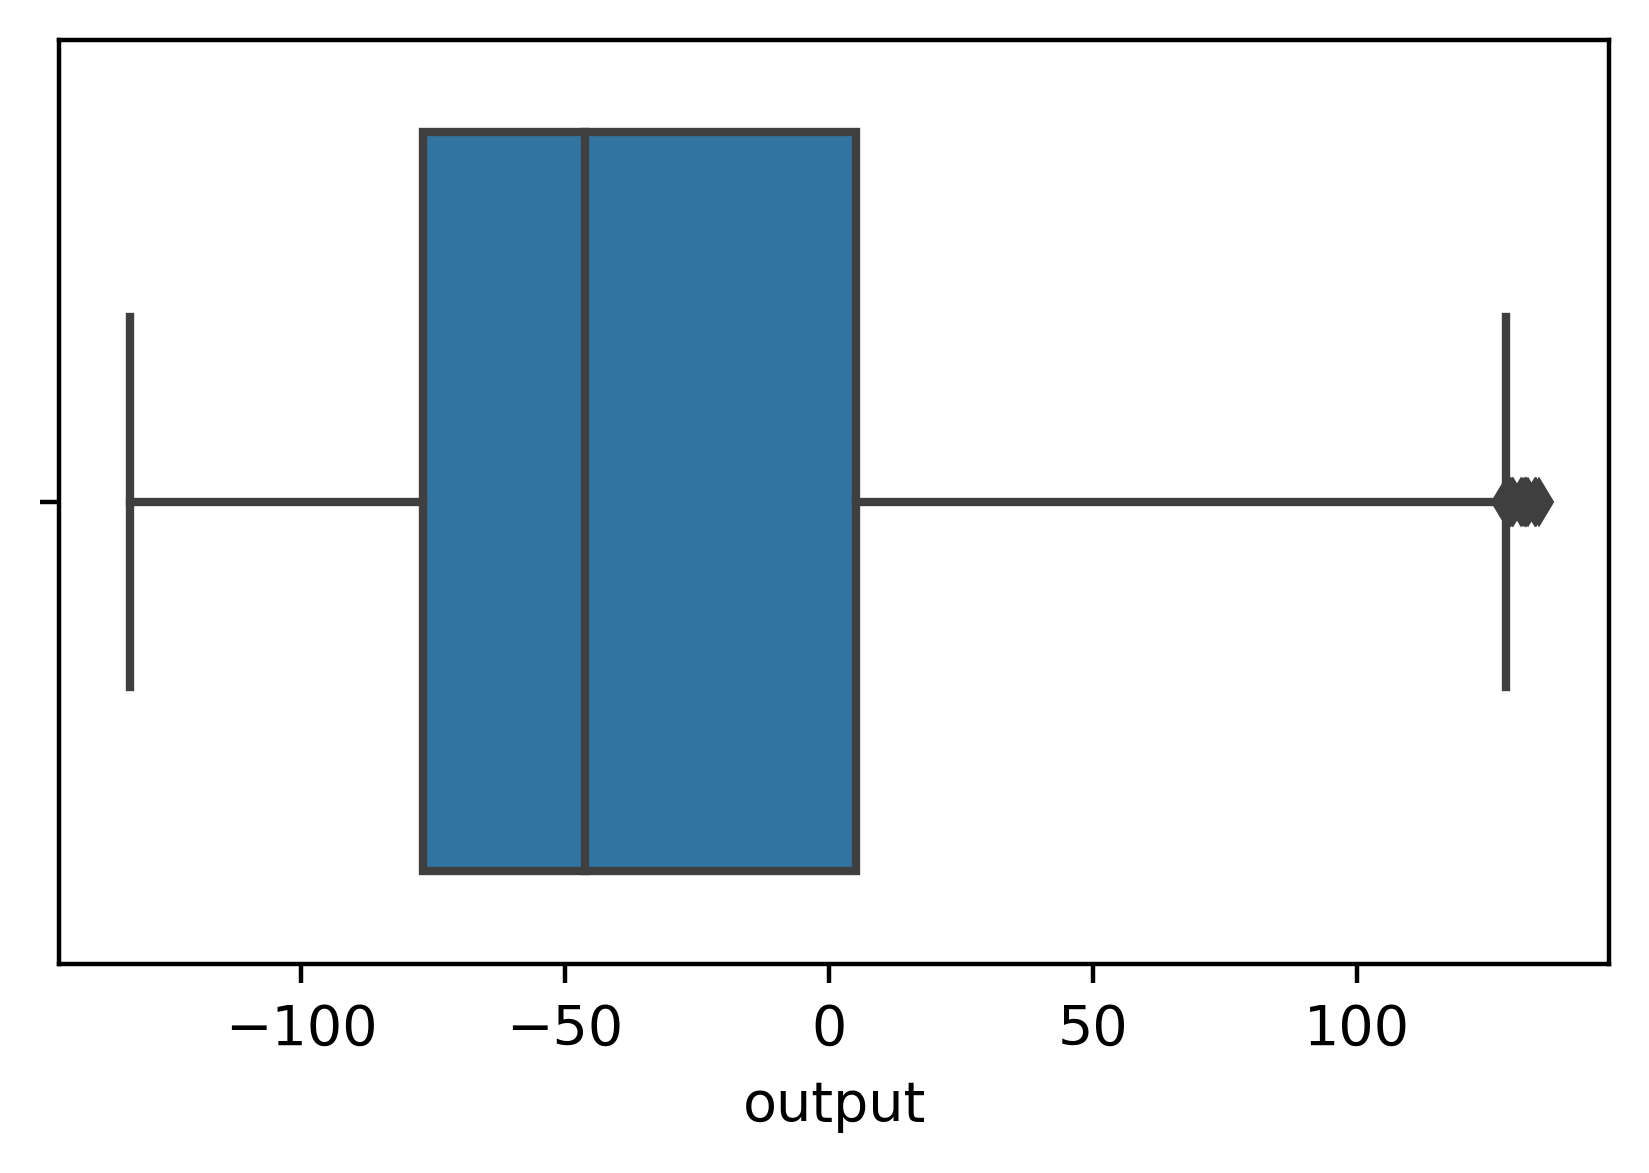

In [54]:
plt.figure(figsize = (5,3), dpi = 200)
sns.boxplot(x= 'output', data = Hack);

#### Intuition:

* From the above boxplot we can observe that output feature is having the outliers

In [55]:
Hack.to_csv('hack.csv')

### Load the clean dataset

In [326]:
hack = pd.read_csv(r"C:\Users\GUDLA RAGUWING\Data Science Course\Artificial Intelligence\hack.csv")

In [327]:
hack

,Unnamed: 0,input,output
0,0,-122.740667,-130.572085
1,1,-121.531419,-129.938929
2,2,-134.917019,-130.141832
3,3,-120.605951,-125.760932
4,4,-129.894781,-112.785214
...,...,...,...
1086,1107,-119.954237,123.609122
1087,1108,-109.942155,127.197394
1088,1109,-111.515368,128.170885
1089,1110,-110.344221,123.087950


In [328]:
hack.drop(['Unnamed: 0'], axis = 1, inplace = True) # droping the column

In [329]:
hack

,input,output
0,-122.740667,-130.572085
1,-121.531419,-129.938929
2,-134.917019,-130.141832
3,-120.605951,-125.760932
4,-129.894781,-112.785214
...,...,...
1086,-119.954237,123.609122
1087,-109.942155,127.197394
1088,-111.515368,128.170885
1089,-110.344221,123.087950


## Step - 4 

* Proper outlier detection and treatment.
* Feature Engineering


## Handling the Outliers

## Detect and transforme the Outliers (Do Not Drop)

# IQR Method

In [330]:
# 1. IQR Method -- Numerical column (output)
Q1,Q2,Q3 = list(hack.output.quantile(q= [0.25,0.5,0.75]).values)
print(Q1,Q2,Q3, sep = ', ')

IQR = Q3-Q1
UP_LI = Q3+1.5*IQR
LO_LI = Q1-1.5*IQR

print(IQR, UP_LI,LO_LI, sep = ', ')

hack[(hack.output>UP_LI )| (hack.output<LO_LI)]# The following records are the outliers in our dataset.

-76.9885951, -46.30093846, 5.0754008045
82.0639959045, 128.17139466125, -200.08458895675


,input,output
354,120.589204,128.416416
358,133.101515,133.793116
359,124.633331,129.000000
361,133.024034,132.055270
471,105.705891,131.841595
473,129.541672,128.589413
475,133.358935,131.916362
478,108.413666,134.425495
1056,122.831827,129.434291
1060,99.683141,129.272153


#### Intuition:

* The above records are the outliers in out output feature in out dataset

In [331]:
# 1. IQR Method -- Numerical column (input)
Q1,Q2,Q3 = list(hack.input.quantile(q= [0.25,0.5,0.75]).values)
print(Q1,Q2,Q3, sep = ', ')

IQR = Q3-Q1
UP_L = Q3+1.5*IQR
LO_L = Q1-1.5*IQR

print(IQR, UP_L,LO_L, sep = ', ')

hack[(hack.input>UP_L )| (hack.input<LO_L)]# The following records are the outliers in our dataset.

-50.99419449, 17.462087345, 76.467547395
127.461741885, 267.6601602225, -242.18680731749998


,input,output


#### Intuition:

* NO outliers in input feature

## Applying cube-root transformation on feature `output`

0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
          ...   
1086    4.981386
1087    5.029129
1088    5.041926
1089    4.974375
1090         NaN
Name: output, Length: 1091, dtype: float64

<AxesSubplot: >

-1.0604091448640767

0.9233018088886171

,input,output,output_trans
0,-122.740667,-130.572085,NaN
1,-121.531419,-129.938929,NaN
2,-134.917019,-130.141832,NaN
3,-120.605951,-125.760932,NaN
4,-129.894781,-112.785214,NaN
...,...,...,...
1086,-119.954237,123.609122,4.981386
1087,-109.942155,127.197394,5.029129
1088,-111.515368,128.170885,5.041926
1089,-110.344221,123.087950,4.974375


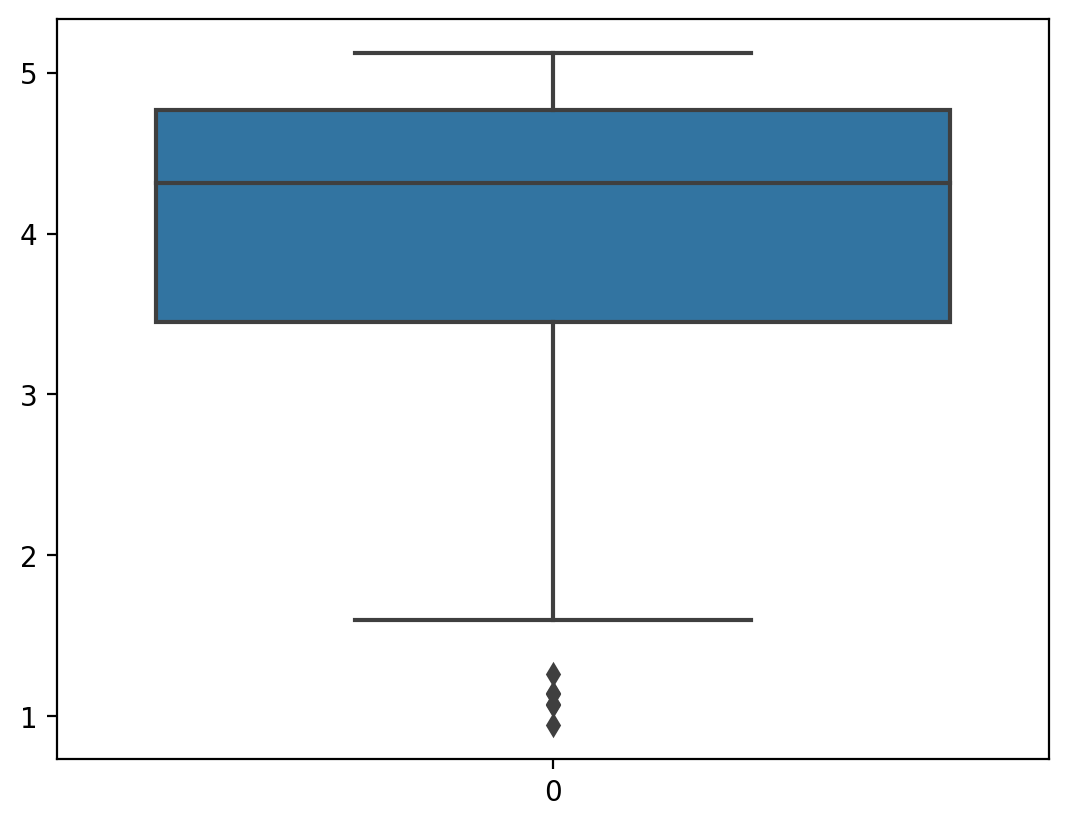

In [99]:
#hack.output**(1/3)
#sns.boxplot(hack.output**(1/3));
#
#(hack.output**(1/3)).skew()
#hack.output.skew()
#hack['output_trans'] = hack.output**(1/3)
#
#hack

In [100]:
#hack.output_trans.isna().sum()

810

#### Intuition:

* We cannot apply BoxCox trasnformation cause it require positive values, our dataset is having negative values
* By Applying the log transformation we are getting more outliers than which are present now, so cannot use it.
* CubeRoot Transformation giving us 810 null values which are to be filled with mean or median which is not possible because if we do it we will be throwing out the original values 

**Finally for this dataset we no need to treat the outliers as they are very few and are present in the output column**

In [209]:
hack.head()

,input,output
0,-122.740667,-130.572085
1,-121.531419,-129.938929
2,-134.917019,-130.141832
3,-120.605951,-125.760932
4,-129.894781,-112.785214


# Visualization

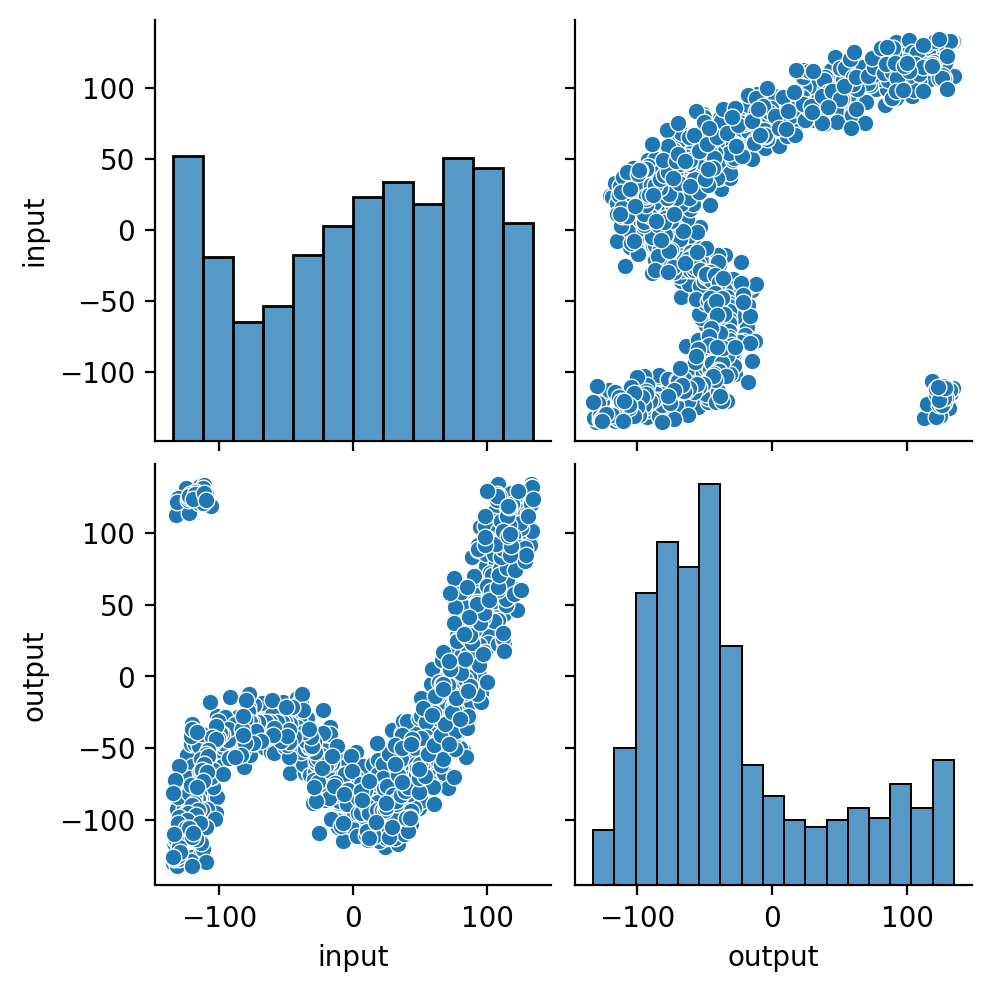

In [332]:
sns.pairplot(hack);

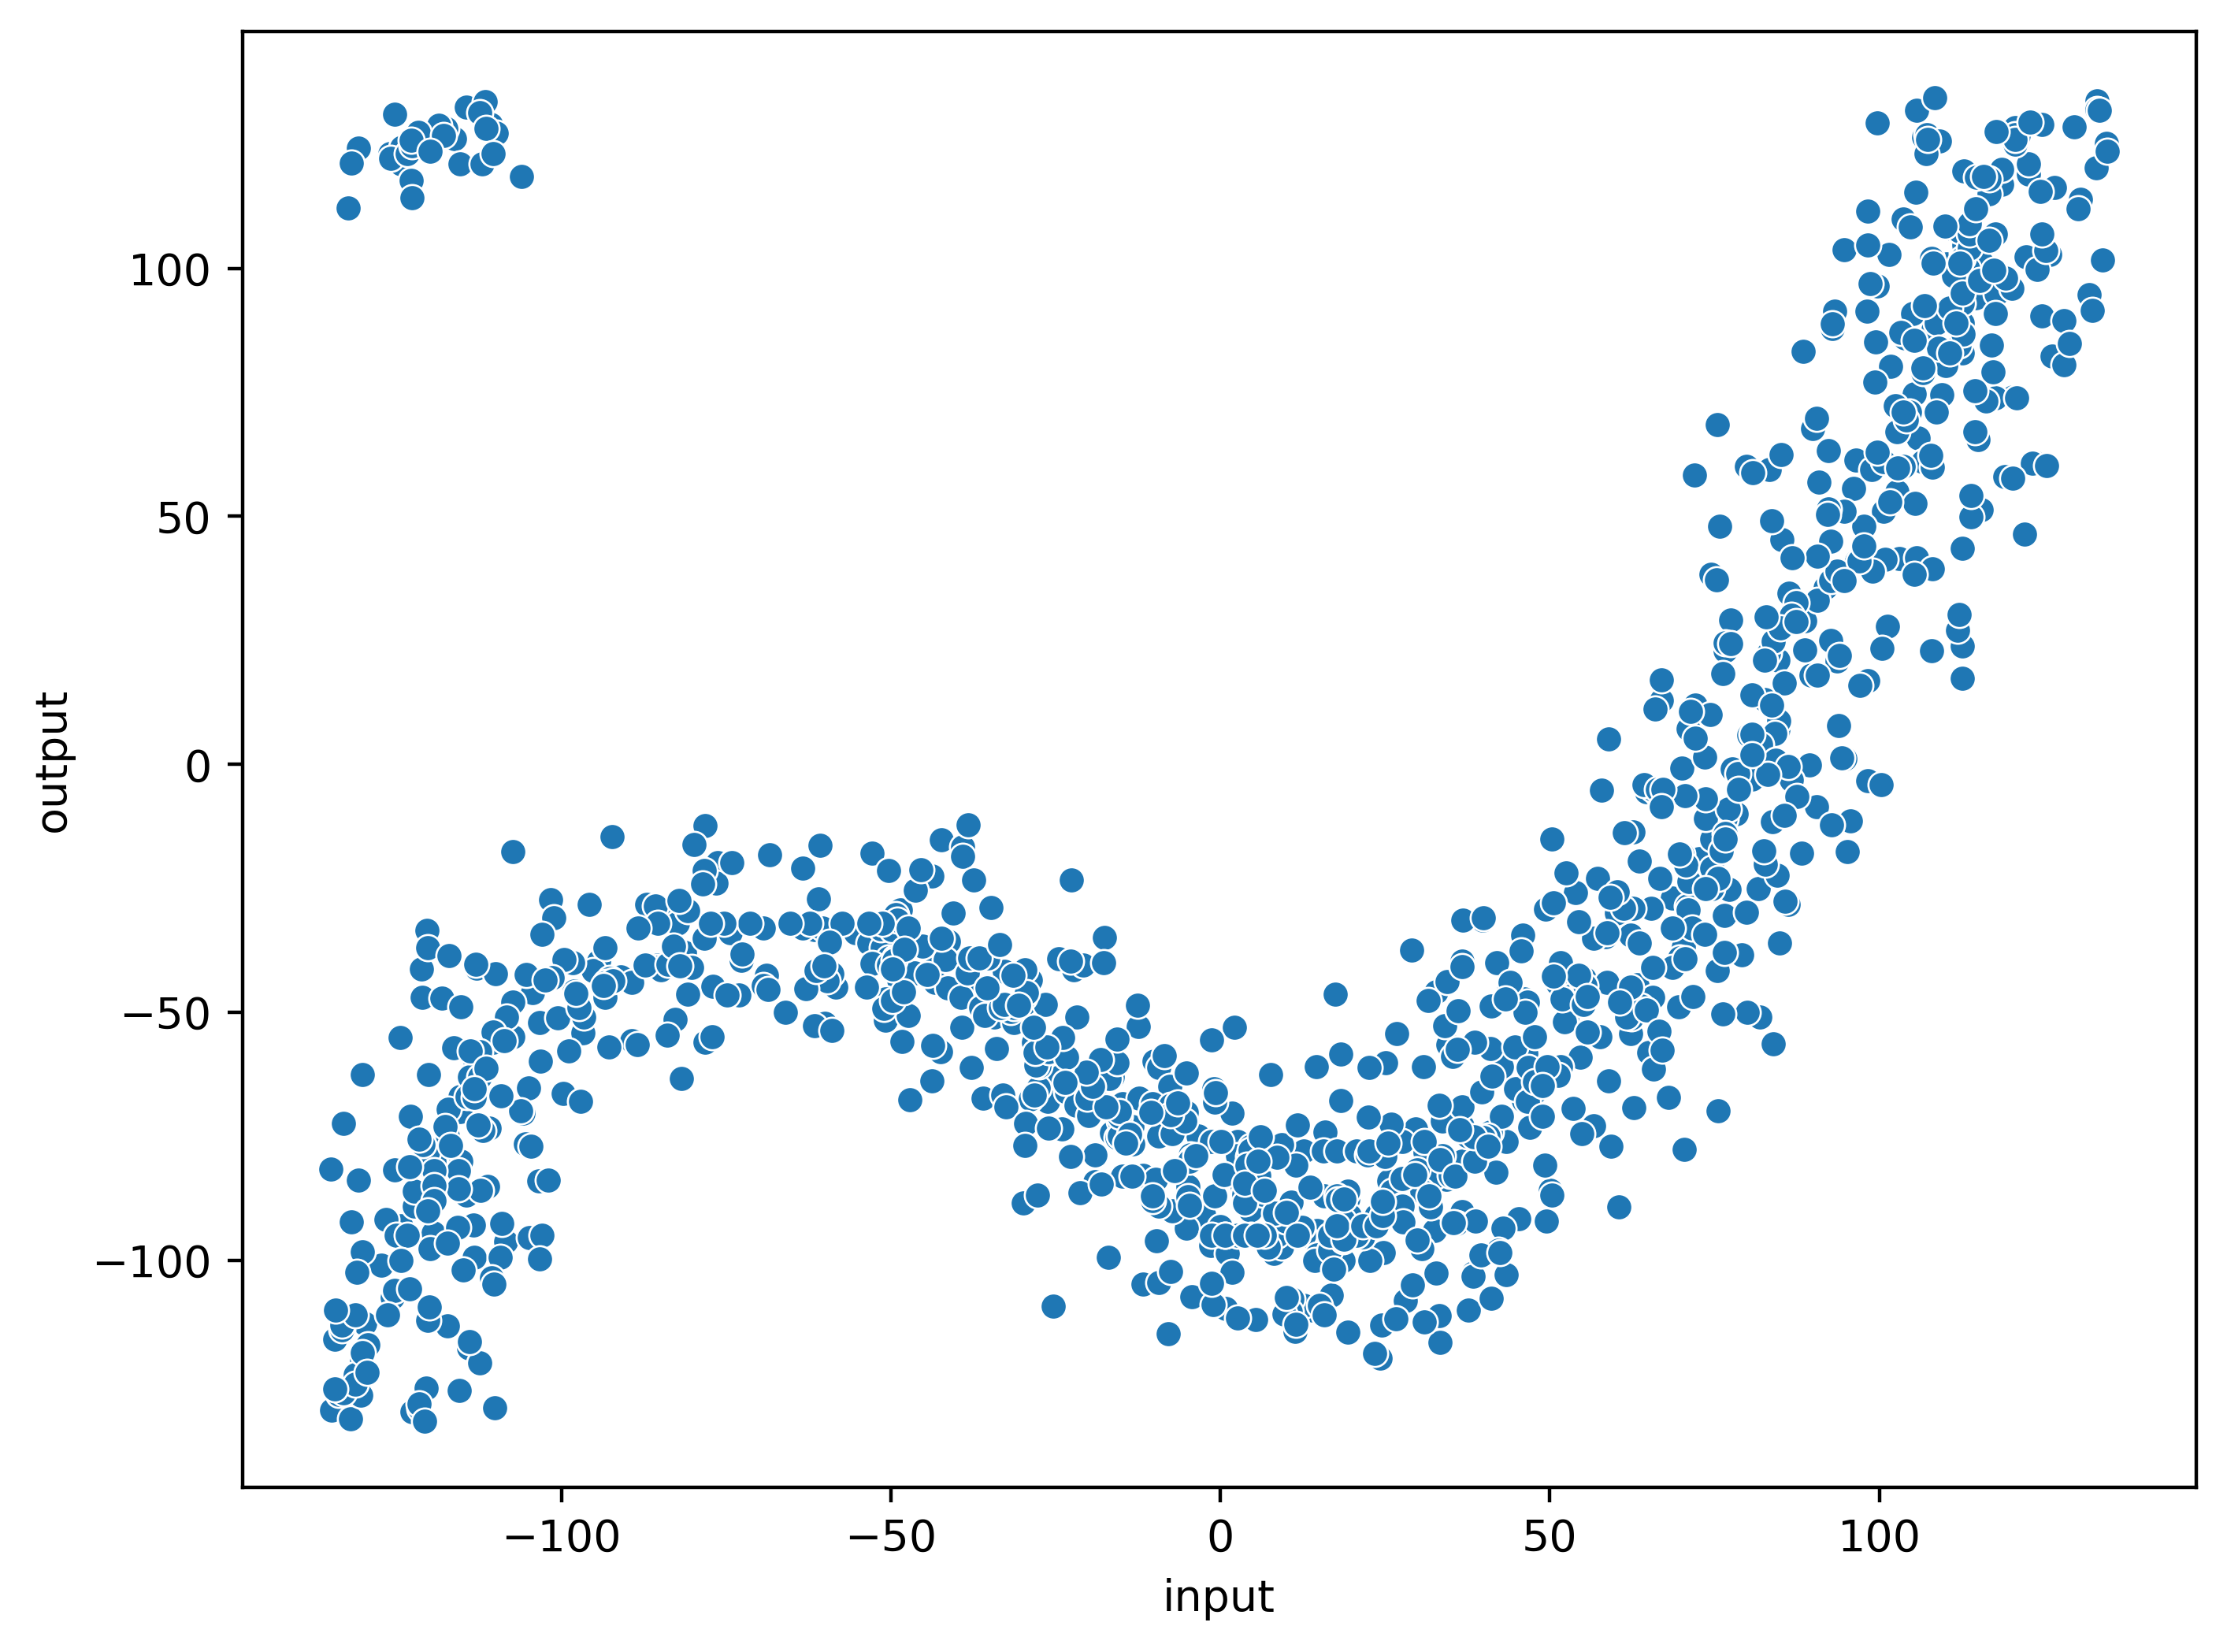

In [333]:
plt.figure(figsize=(8,6), dpi = 200)
sns.scatterplot(x = 'input', y= 'output',data = hack);  # scatterplot 

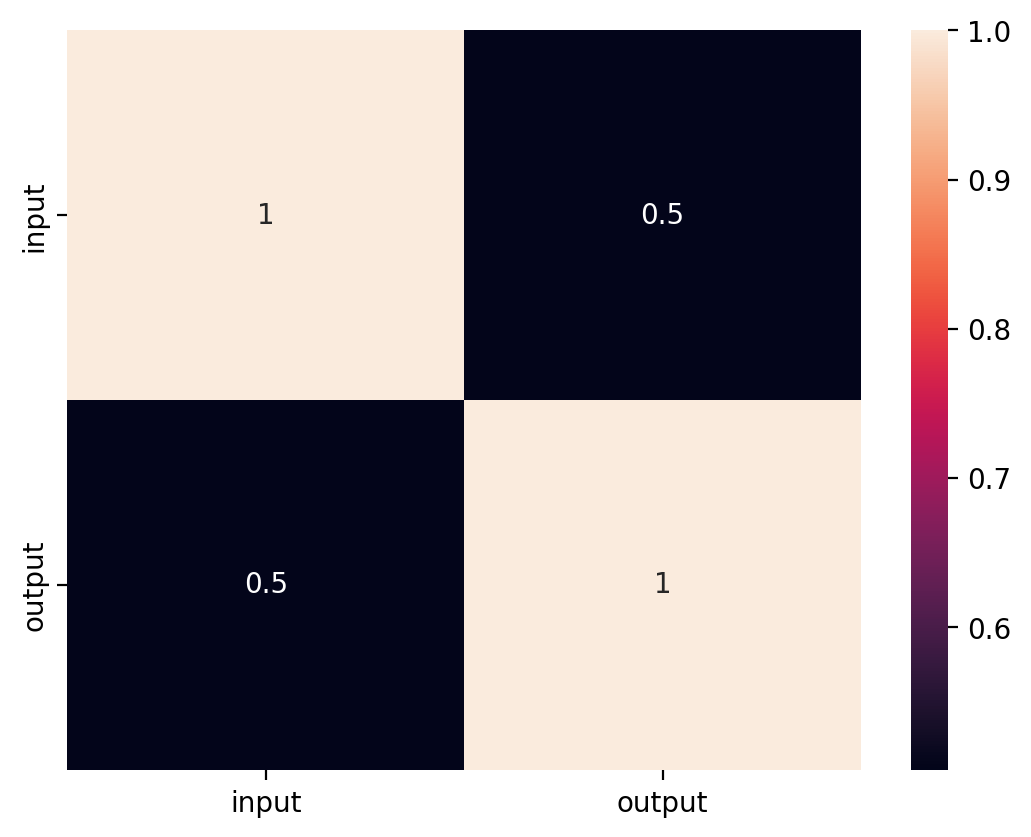

In [334]:
sns.heatmap(hack.corr(), annot=True); # heatmap between numerical columns

# Step 3 & Step 5

1. Identify the input and output/target variables. 
2. Identify the type of ML Task.
3. Identify the Evaluation Metric.

In [210]:
X = hack[['input']]
y = hack['output']

### Type, Task to be performed
* As we can observe that the target variable is given in the historical data, Hence this is a `Supervised Learning`.
* `y` belongs to **Continuous Numerical** feature

- ML Task: **`Regression`** 

### Evaluation metrics
* For Regression ML Task the following Evaluation metrics can be used:
    1. **Mean Squared Error**
    2. **Root Mean Squared Error**
    3. **Mean Absolute Error**
    4. **R^2 (Coefficient of Determinate)**
    5. **Adjusted R^2**

### Split the dataset into Training and Testing

In [261]:
# splitting the historical data into train and test.

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.70, random_state=27)

In [262]:
X_train.head()

,input
601,32.633331
196,2.131207
605,30.633331
643,17.641395
854,-130.366669


In [263]:
y_train.head()

601    -83.000000
196    -53.048047
605    -86.000000
643    -86.955204
854   -120.000000
Name: output, dtype: float64

In [264]:
print(X_train.shape, y_train.shape)

print(X_test.shape, y_test.shape)

(763, 1) (763,)
(328, 1) (328,)


### Data preparation on train data:

In [265]:
# scaling the numerical features on the Training Data
from sklearn.preprocessing import StandardScaler

Std_scaler = StandardScaler()

# feature names will be (annoyingly) lost after Scaling the data
# (i.e. the dataframe is converted to a numpy ndarray)

X_train_trns = pd.DataFrame(Std_scaler.fit_transform(X_train),
                                     columns = X_train.columns,
                                     index = X_train.index)
X_train_trns.head()

,input
601,0.311620
196,-0.074995
605,0.286270
643,0.121597
854,-1.754409


### Data preparation on test data:

In [266]:
X_test_trns = pd.DataFrame(Std_scaler.transform(X_test),
                                     columns = X_test.columns,
                                     index = X_test.index)
X_test_trns.head()

,input
1080,-1.665750
184,-0.377567
271,0.693561
283,0.932037
526,0.963914


## Model Training Phase , Prediction Phase

In [267]:
from sklearn.linear_model import LinearRegression
regressor1 = LinearRegression()
regressor1.fit(X_train_trns, y_train) # Training the model and Building the model

y_test_pre1 = regressor1.predict(X_test_trns) # Prediction

from sklearn import metrics

print('Mean Squared Error: ', metrics.mean_squared_error(y_test, y_test_pre1))
print('Root Mean Squared Error: ', np.sqrt(metrics.mean_squared_error(y_test, y_test_pre1)))
print('Mean Absolute Error: ', metrics.mean_absolute_error(y_test, y_test_pre1))
print('R^2 (Coefficient of Determinate): ', metrics.r2_score(y_test, y_test_pre1))

LI_REG =  metrics.mean_absolute_error(y_test, y_test_pre1)
LI_REG1 =  metrics.r2_score(y_test, y_test_pre1)
# Evaluating the model using the Evaluation metrics

LinearRegression()

Mean Squared Error:  3375.562406802569
Root Mean Squared Error:  58.099590418544
Mean Absolute Error:  44.072034673573484
R^2 (Coefficient of Determinate):  0.2754351782644838


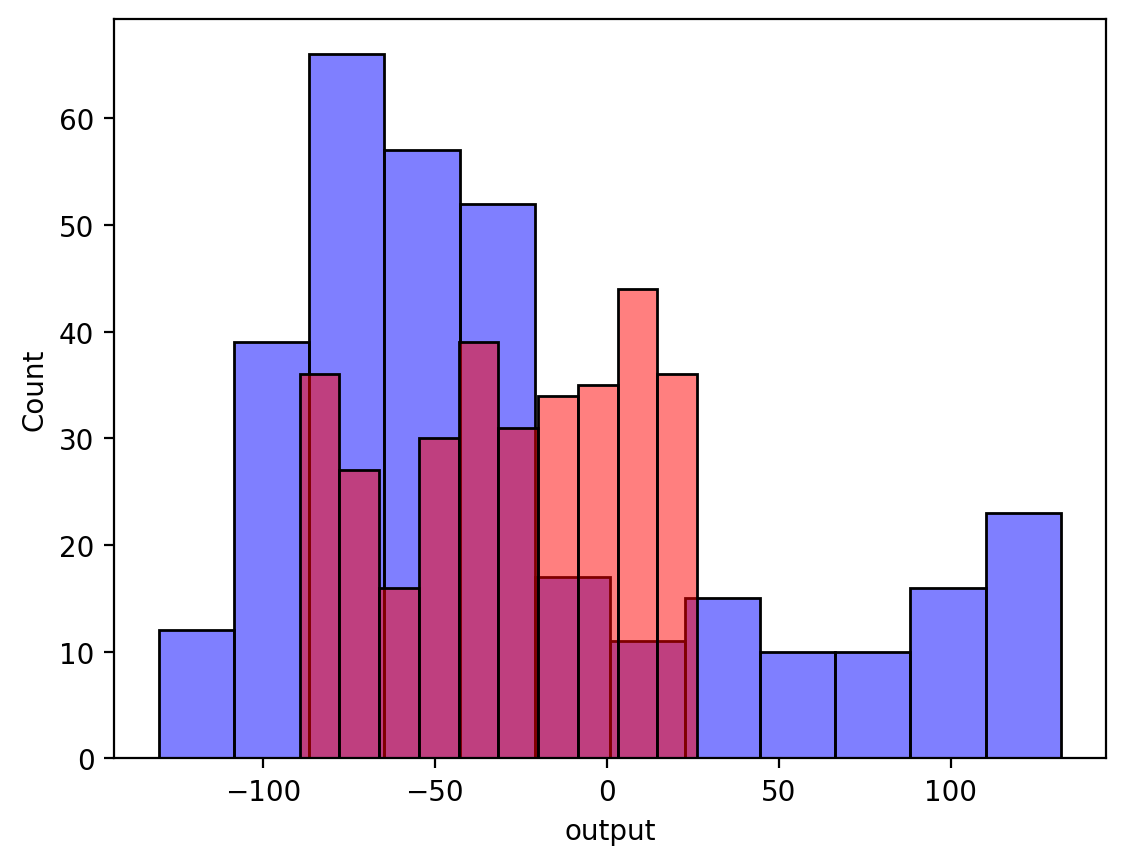

In [268]:
sns.histplot(y_test, color='blue', alpha=0.5)
sns.histplot(y_test_pre1, color='red', alpha=0.5); # Visualizing the model performance 

In [269]:
from sklearn.neighbors import KNeighborsRegressor
regressor2 = KNeighborsRegressor()
regressor2.fit(X_train_trns, y_train)

y_test_pre2 = regressor2.predict(X_test_trns)

from sklearn import metrics
print('Mean Squared Error: ', metrics.mean_squared_error(y_test, y_test_pre2))
print('Root Mean Squared Error: ', np.sqrt(metrics.mean_squared_error(y_test, y_test_pre2)))
print('Mean Absolute Error: ', metrics.mean_absolute_error(y_test, y_test_pre2))
print('R^2 (Coefficient of Determinate): ', metrics.r2_score(y_test, y_test_pre2))

KN_REG =  metrics.mean_absolute_error(y_test, y_test_pre2)
KN_REG1 = metrics.r2_score(y_test, y_test_pre2)

KNeighborsRegressor()

Mean Squared Error:  1469.9272479631193
Root Mean Squared Error:  38.339630253343856
Mean Absolute Error:  23.416922793396342
R^2 (Coefficient of Determinate):  0.6844799633275247


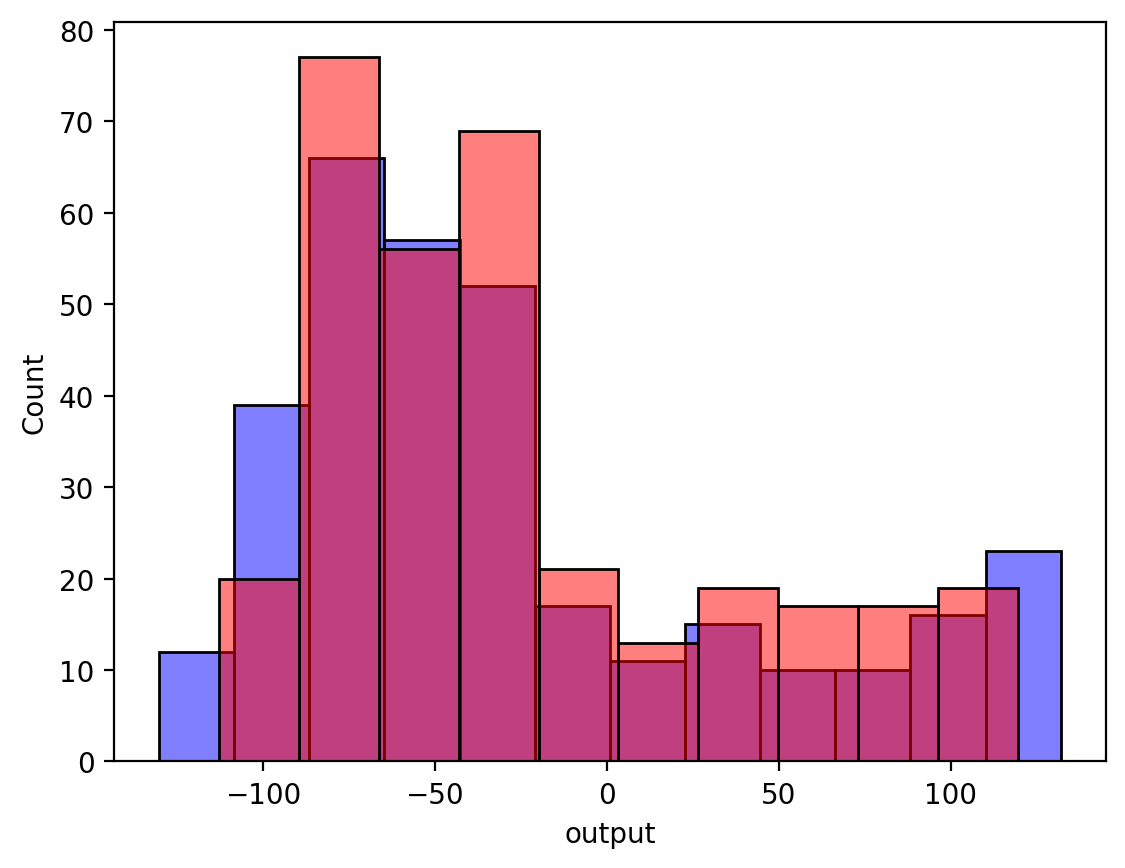

In [270]:
sns.histplot(y_test, color='blue', alpha=0.5)
sns.histplot(y_test_pre2, color='red', alpha=0.5);

In [271]:
from sklearn.svm import SVR
regressor3 = SVR()
regressor3.fit(X_train_trns, y_train)

y_test_pre3 = regressor3.predict(X_test_trns)

from sklearn import metrics
print('Mean Squared Error: ', metrics.mean_squared_error(y_test, y_test_pre3))
print('Root Mean Squared Error: ', np.sqrt(metrics.mean_squared_error(y_test, y_test_pre3)))
print('Mean Absolute Error: ', metrics.mean_absolute_error(y_test, y_test_pre3))
print('R^2 (Coefficient of Determinate): ', metrics.r2_score(y_test, y_test_pre3))
SVR = metrics.mean_absolute_error(y_test, y_test_pre3)
SVR1 = metrics.r2_score(y_test, y_test_pre3)

SVR()

Mean Squared Error:  1692.1704575933368
Root Mean Squared Error:  41.13599953317455
Mean Absolute Error:  25.95990040044851
R^2 (Coefficient of Determinate):  0.6367754352633616


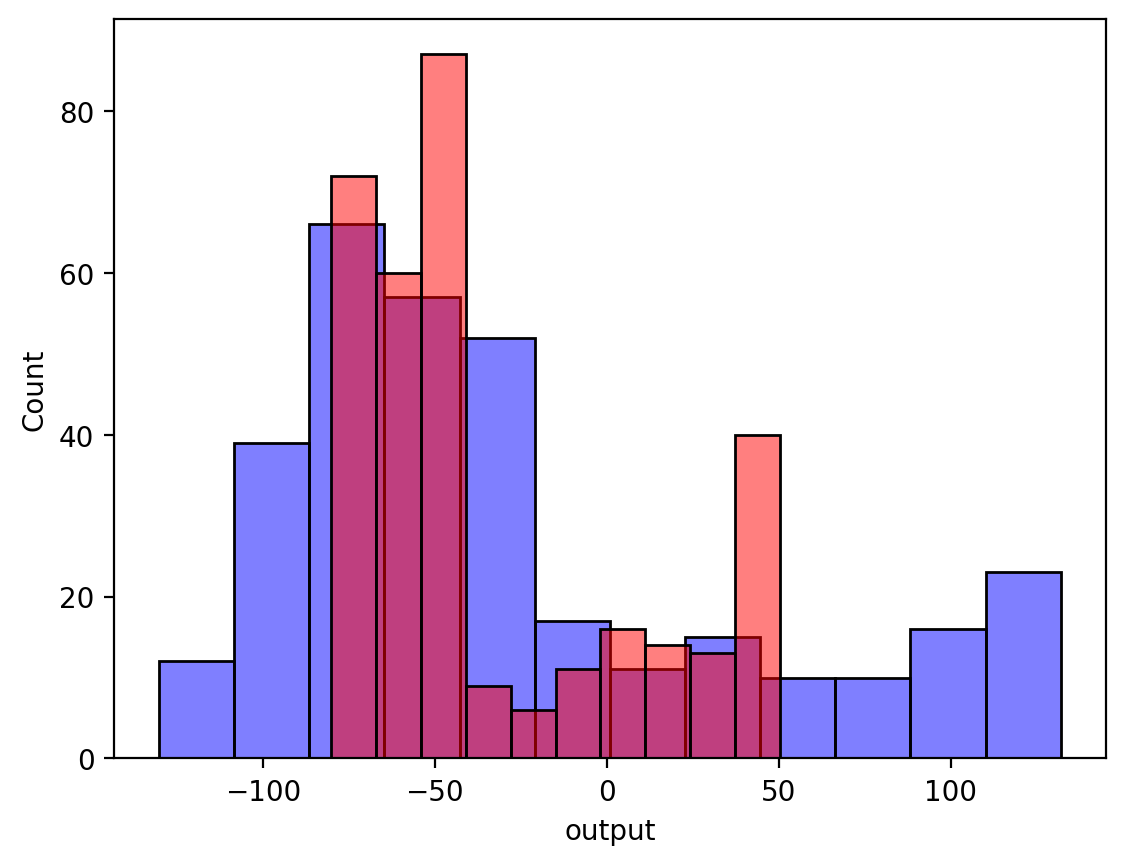

In [272]:
sns.histplot(y_test, color='blue', alpha=0.5)
sns.histplot(y_test_pre3, color='red', alpha=0.5);

In [273]:
from sklearn.tree import DecisionTreeRegressor
regressor4 = DecisionTreeRegressor()
regressor4.fit(X_train_trns, y_train)

y_test_pre4 = regressor4.predict(X_test_trns)

from sklearn import metrics
print('Mean Squared Error: ', metrics.mean_squared_error(y_test, y_test_pre4))
print('Root Mean Squared Error: ', np.sqrt(metrics.mean_squared_error(y_test, y_test_pre4)))
print('Mean Absolute Error: ', metrics.mean_absolute_error(y_test, y_test_pre4))
print('R^2 (Coefficient of Determinate): ', metrics.r2_score(y_test, y_test_pre4))
DT_REG = metrics.mean_absolute_error(y_test, y_test_pre4)
DT_REG1 = metrics.r2_score(y_test, y_test_pre4)

DecisionTreeRegressor()

Mean Squared Error:  2435.2814292840603
Root Mean Squared Error:  49.348570691399566
Mean Absolute Error:  29.239069498090448
R^2 (Coefficient of Determinate):  0.47726658789389054


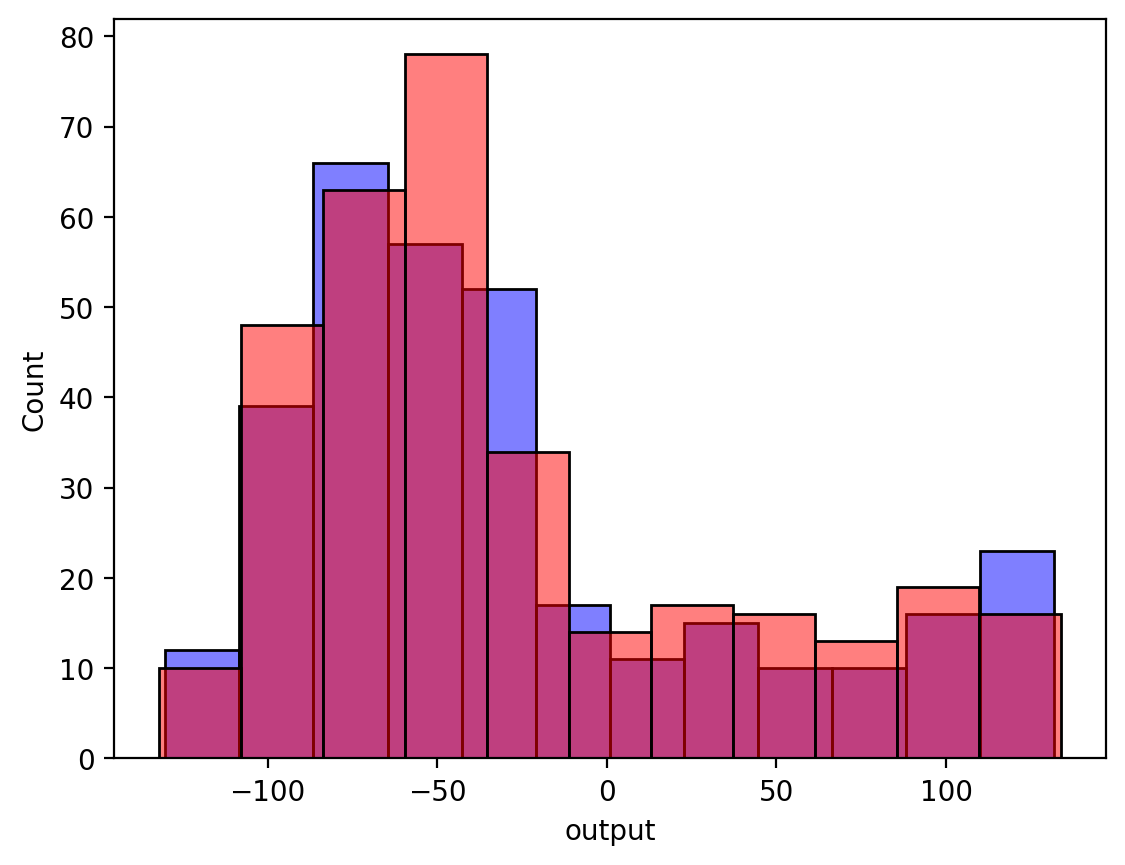

In [274]:
sns.histplot(y_test, color='blue', alpha=0.5)
sns.histplot(y_test_pre4, color='red', alpha=0.5);

In [275]:
from sklearn.ensemble import RandomForestRegressor
reggressor5 = RandomForestRegressor()
reggressor5.fit(X_train_trns, y_train)

y_test_pre5 = reggressor5.predict(X_test_trns)

from sklearn import metrics
print('Mean Squared Error: ', metrics.mean_squared_error(y_test, y_test_pre5))
print('Root Mean Squared Error: ', np.sqrt(metrics.mean_squared_error(y_test, y_test_pre5)))
print('Mean Absolute Error: ', metrics.mean_absolute_error(y_test, y_test_pre5))
print('R^2 (Coefficient of Determinate): ', metrics.r2_score(y_test, y_test_pre5))

RF_REG = metrics.mean_absolute_error(y_test, y_test_pre5)
RF_REG1 = metrics.r2_score(y_test, y_test_pre5)

RandomForestRegressor()

Mean Squared Error:  1804.6106987017442
Root Mean Squared Error:  42.480709724553144
Mean Absolute Error:  25.43119145230408
R^2 (Coefficient of Determinate):  0.612640125813763


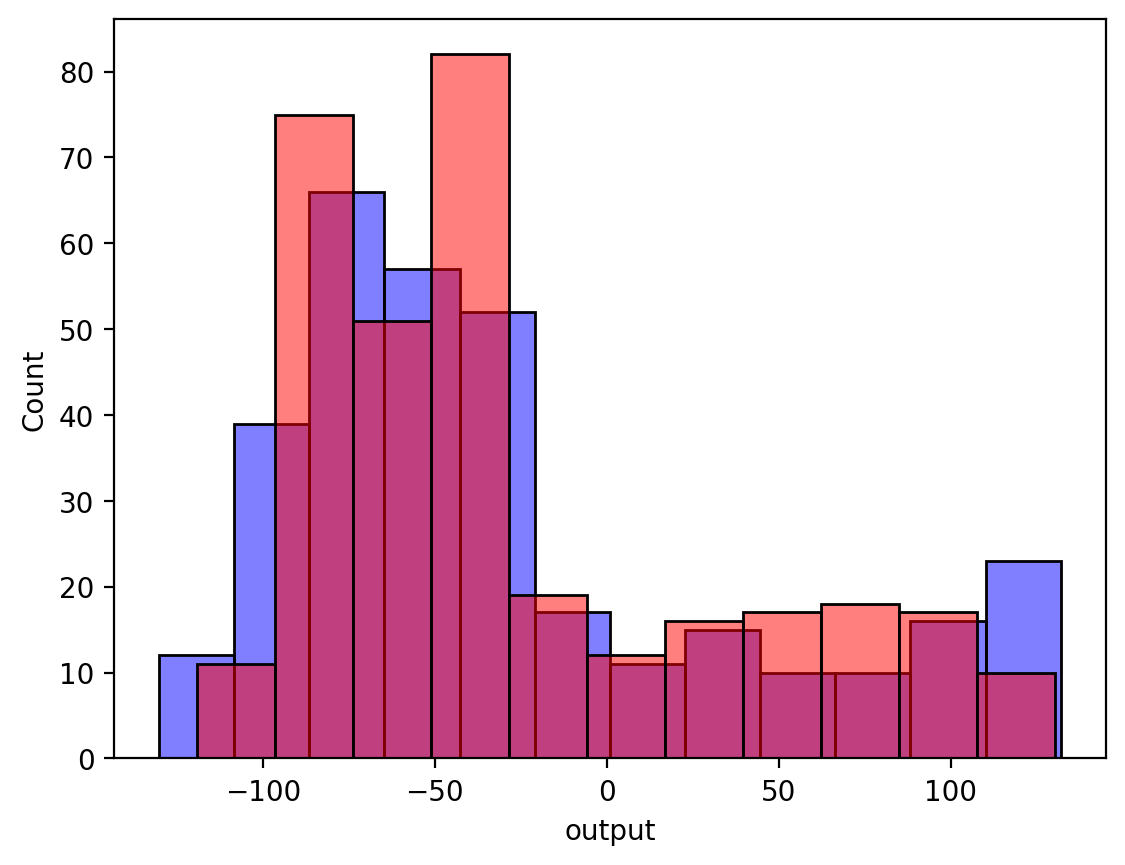

In [276]:
sns.histplot(y_test, color='blue', alpha=0.5)
sns.histplot(y_test_pre5, color='red', alpha=0.5);

In [277]:
from sklearn.ensemble import GradientBoostingRegressor # importing the GBDT Regressor class
GBDT_reg = GradientBoostingRegressor() # Object Creation of the call.
GBDT_reg.fit(X_train_trns,y_train)  # Building the model.
y_test_pre6 = GBDT_reg.predict(X_test_trns) # prediction.
from sklearn import metrics
print('Mean Squared Error: ', metrics.mean_squared_error(y_test, y_test_pre6))
print('Root Mean Squared Error: ', np.sqrt(metrics.mean_squared_error(y_test, y_test_pre6)))
print('Mean Absolute Error: ', metrics.mean_absolute_error(y_test, y_test_pre6))
print('R^2 (Coefficient of Determinate): ', metrics.r2_score(y_test, y_test_pre6))
GBDT_REG = metrics.mean_absolute_error(y_test, y_test_pre6)
GBDT_REG1 = metrics.r2_score(y_test, y_test_pre6)
# Evaluation of the original and predict.


GradientBoostingRegressor()

Mean Squared Error:  1567.876766431644
Root Mean Squared Error:  39.59642365708858
Mean Absolute Error:  22.260335271658043
R^2 (Coefficient of Determinate):  0.6634550889998563


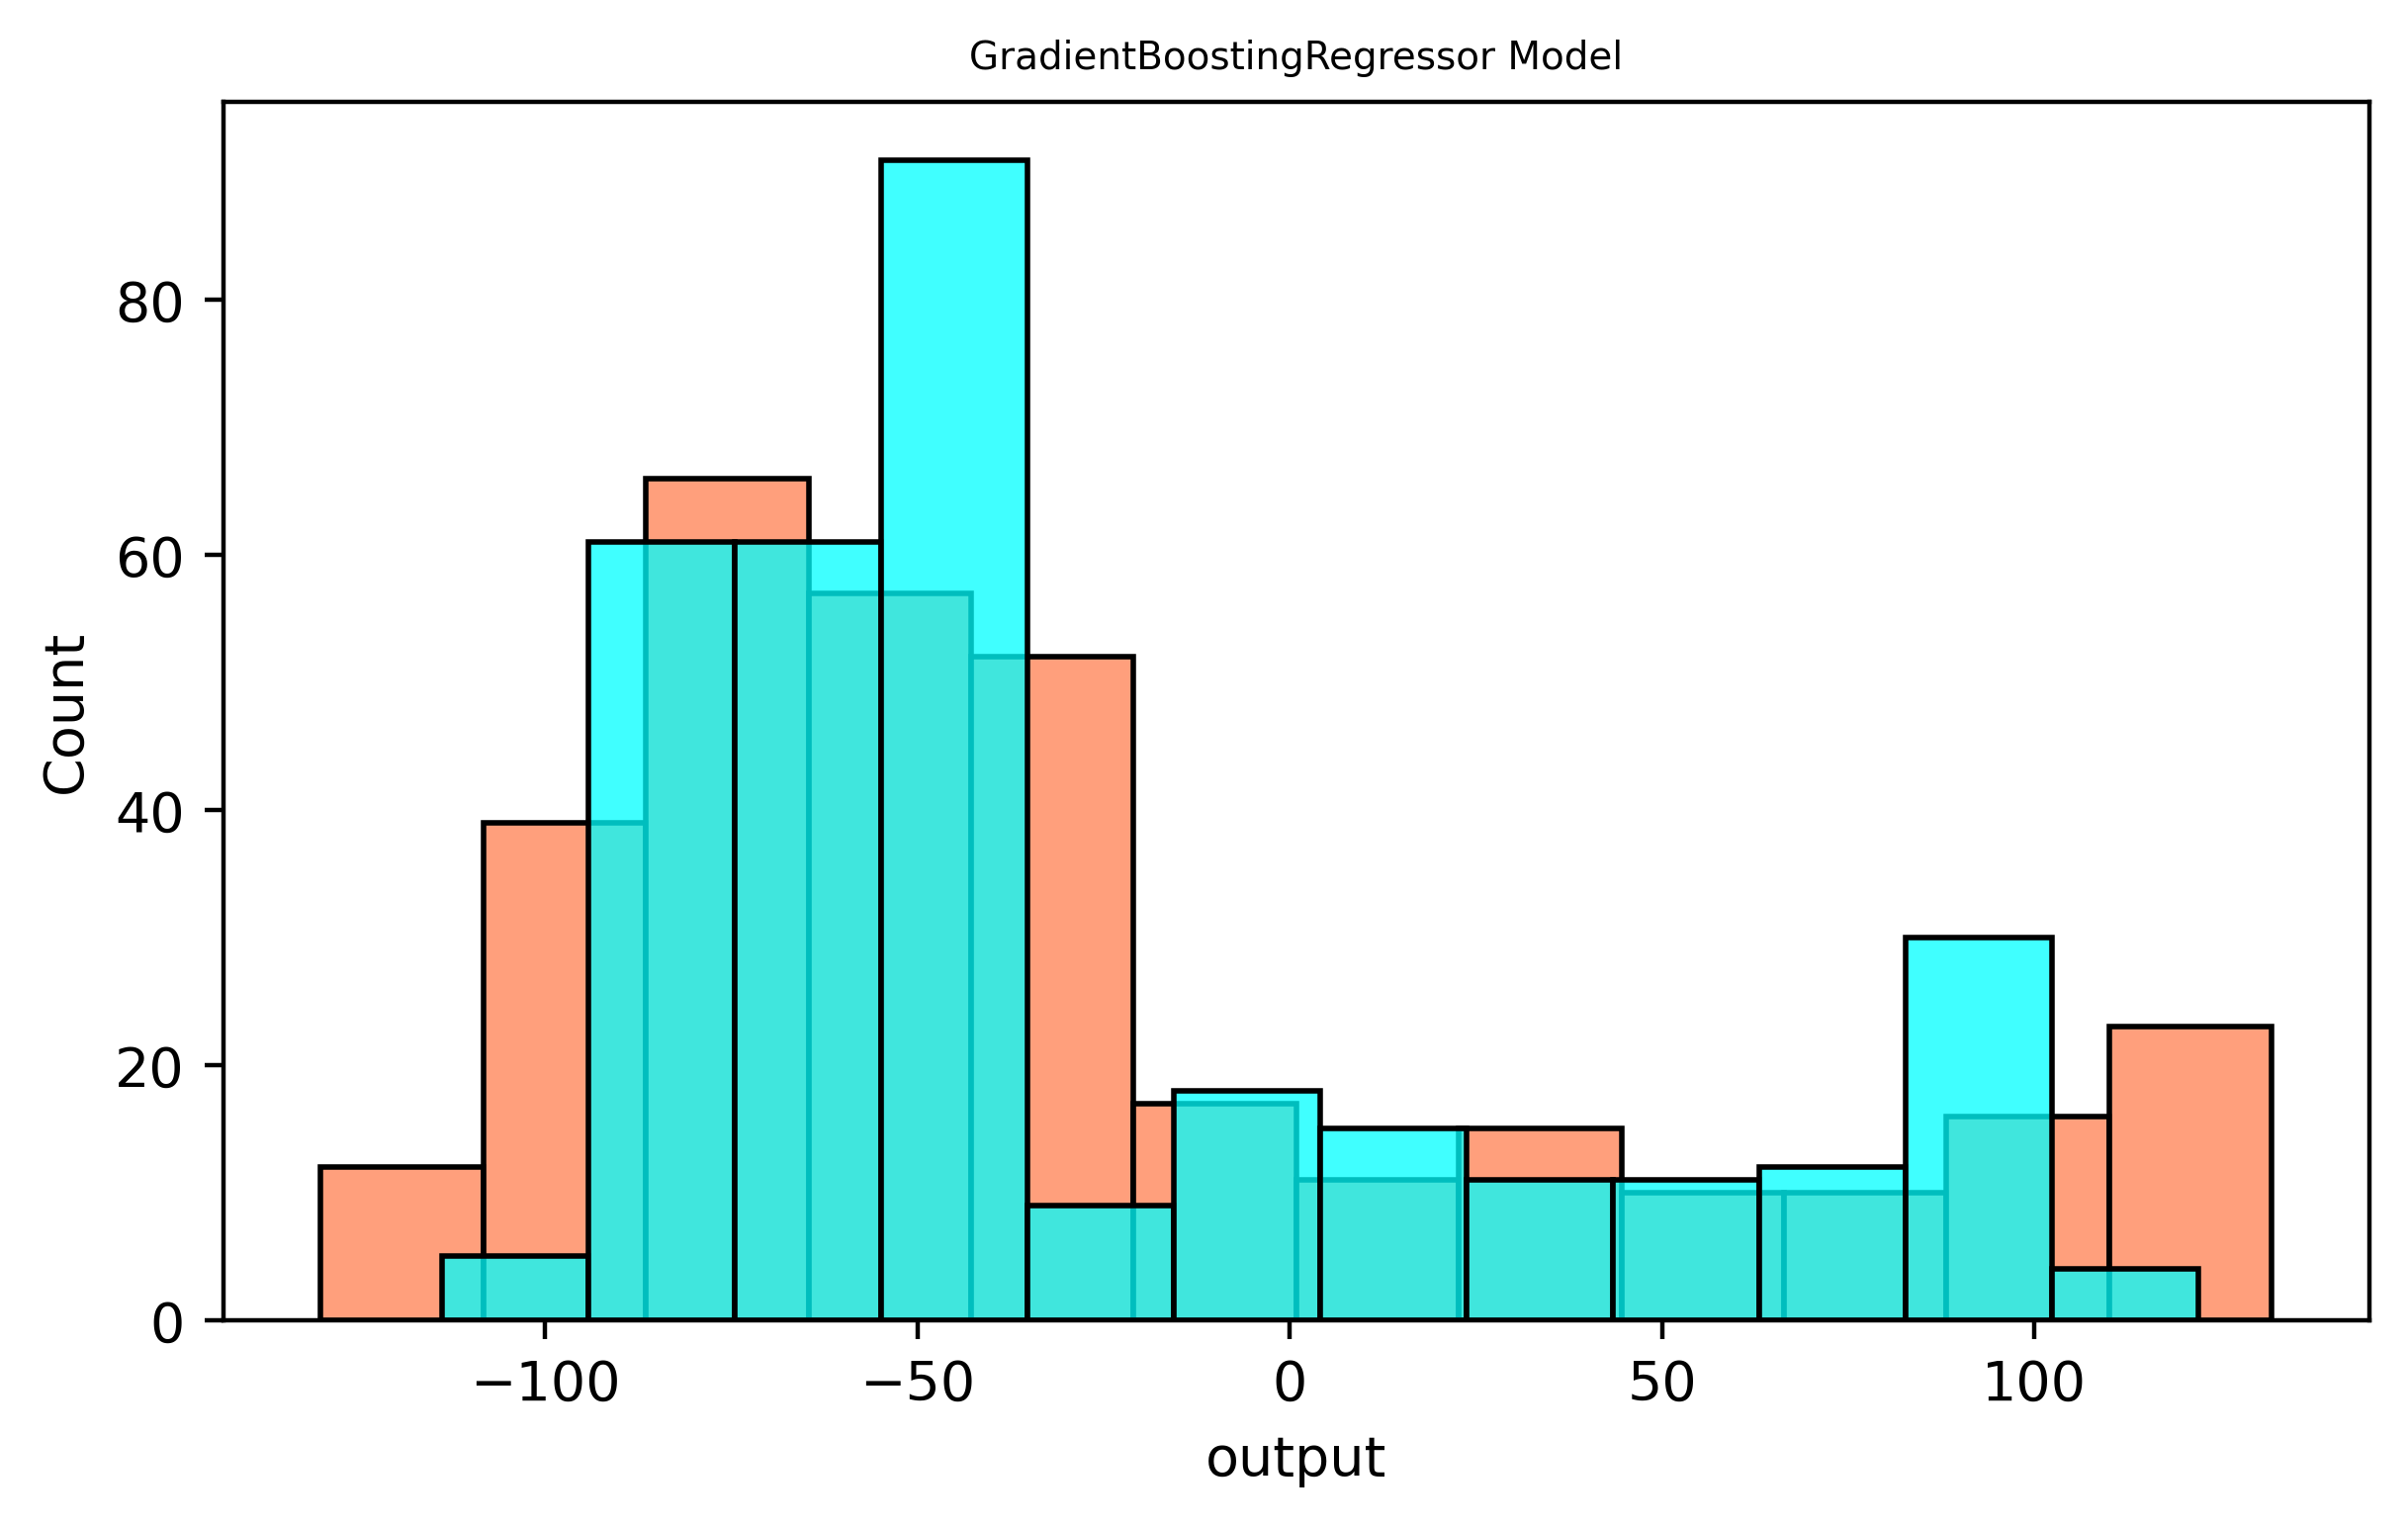

In [278]:
plt.figure(figsize=(7,4), dpi = 200)
plt.title('GradientBoostingRegressor Model', fontsize = 7)
sns.histplot(y_test, color='coral')
sns.histplot(y_test_pre6, color='cyan'); # Visualization.

In [283]:
from sklearn.ensemble import AdaBoostRegressor # importing the GBDT Regressor class
ADA_reg = AdaBoostRegressor() # Object Creation of the call.
ADA_reg.fit(X_train_trns,y_train)  # Building the model.
y_test_pre7 = ADA_reg.predict(X_test_trns) # prediction.
from sklearn import metrics
print('Mean Squared Error: ', metrics.mean_squared_error(y_test, y_test_pre7))
print('Root Mean Squared Error: ', np.sqrt(metrics.mean_squared_error(y_test, y_test_pre7)))
print('Mean Absolute Error: ', metrics.mean_absolute_error(y_test, y_test_pre7))
print('R^2 (Coefficient of Determinate): ', metrics.r2_score(y_test, y_test_pre7))
ADA_REG = metrics.mean_absolute_error(y_test, y_test_pre7)
ADA_REG1 = metrics.r2_score(y_test, y_test_pre7)
# Evaluation of the original and predict.

AdaBoostRegressor()

Mean Squared Error:  1605.2728261720495
Root Mean Squared Error:  40.06585611430323
Mean Absolute Error:  27.545618726314586
R^2 (Coefficient of Determinate):  0.6554280208867582


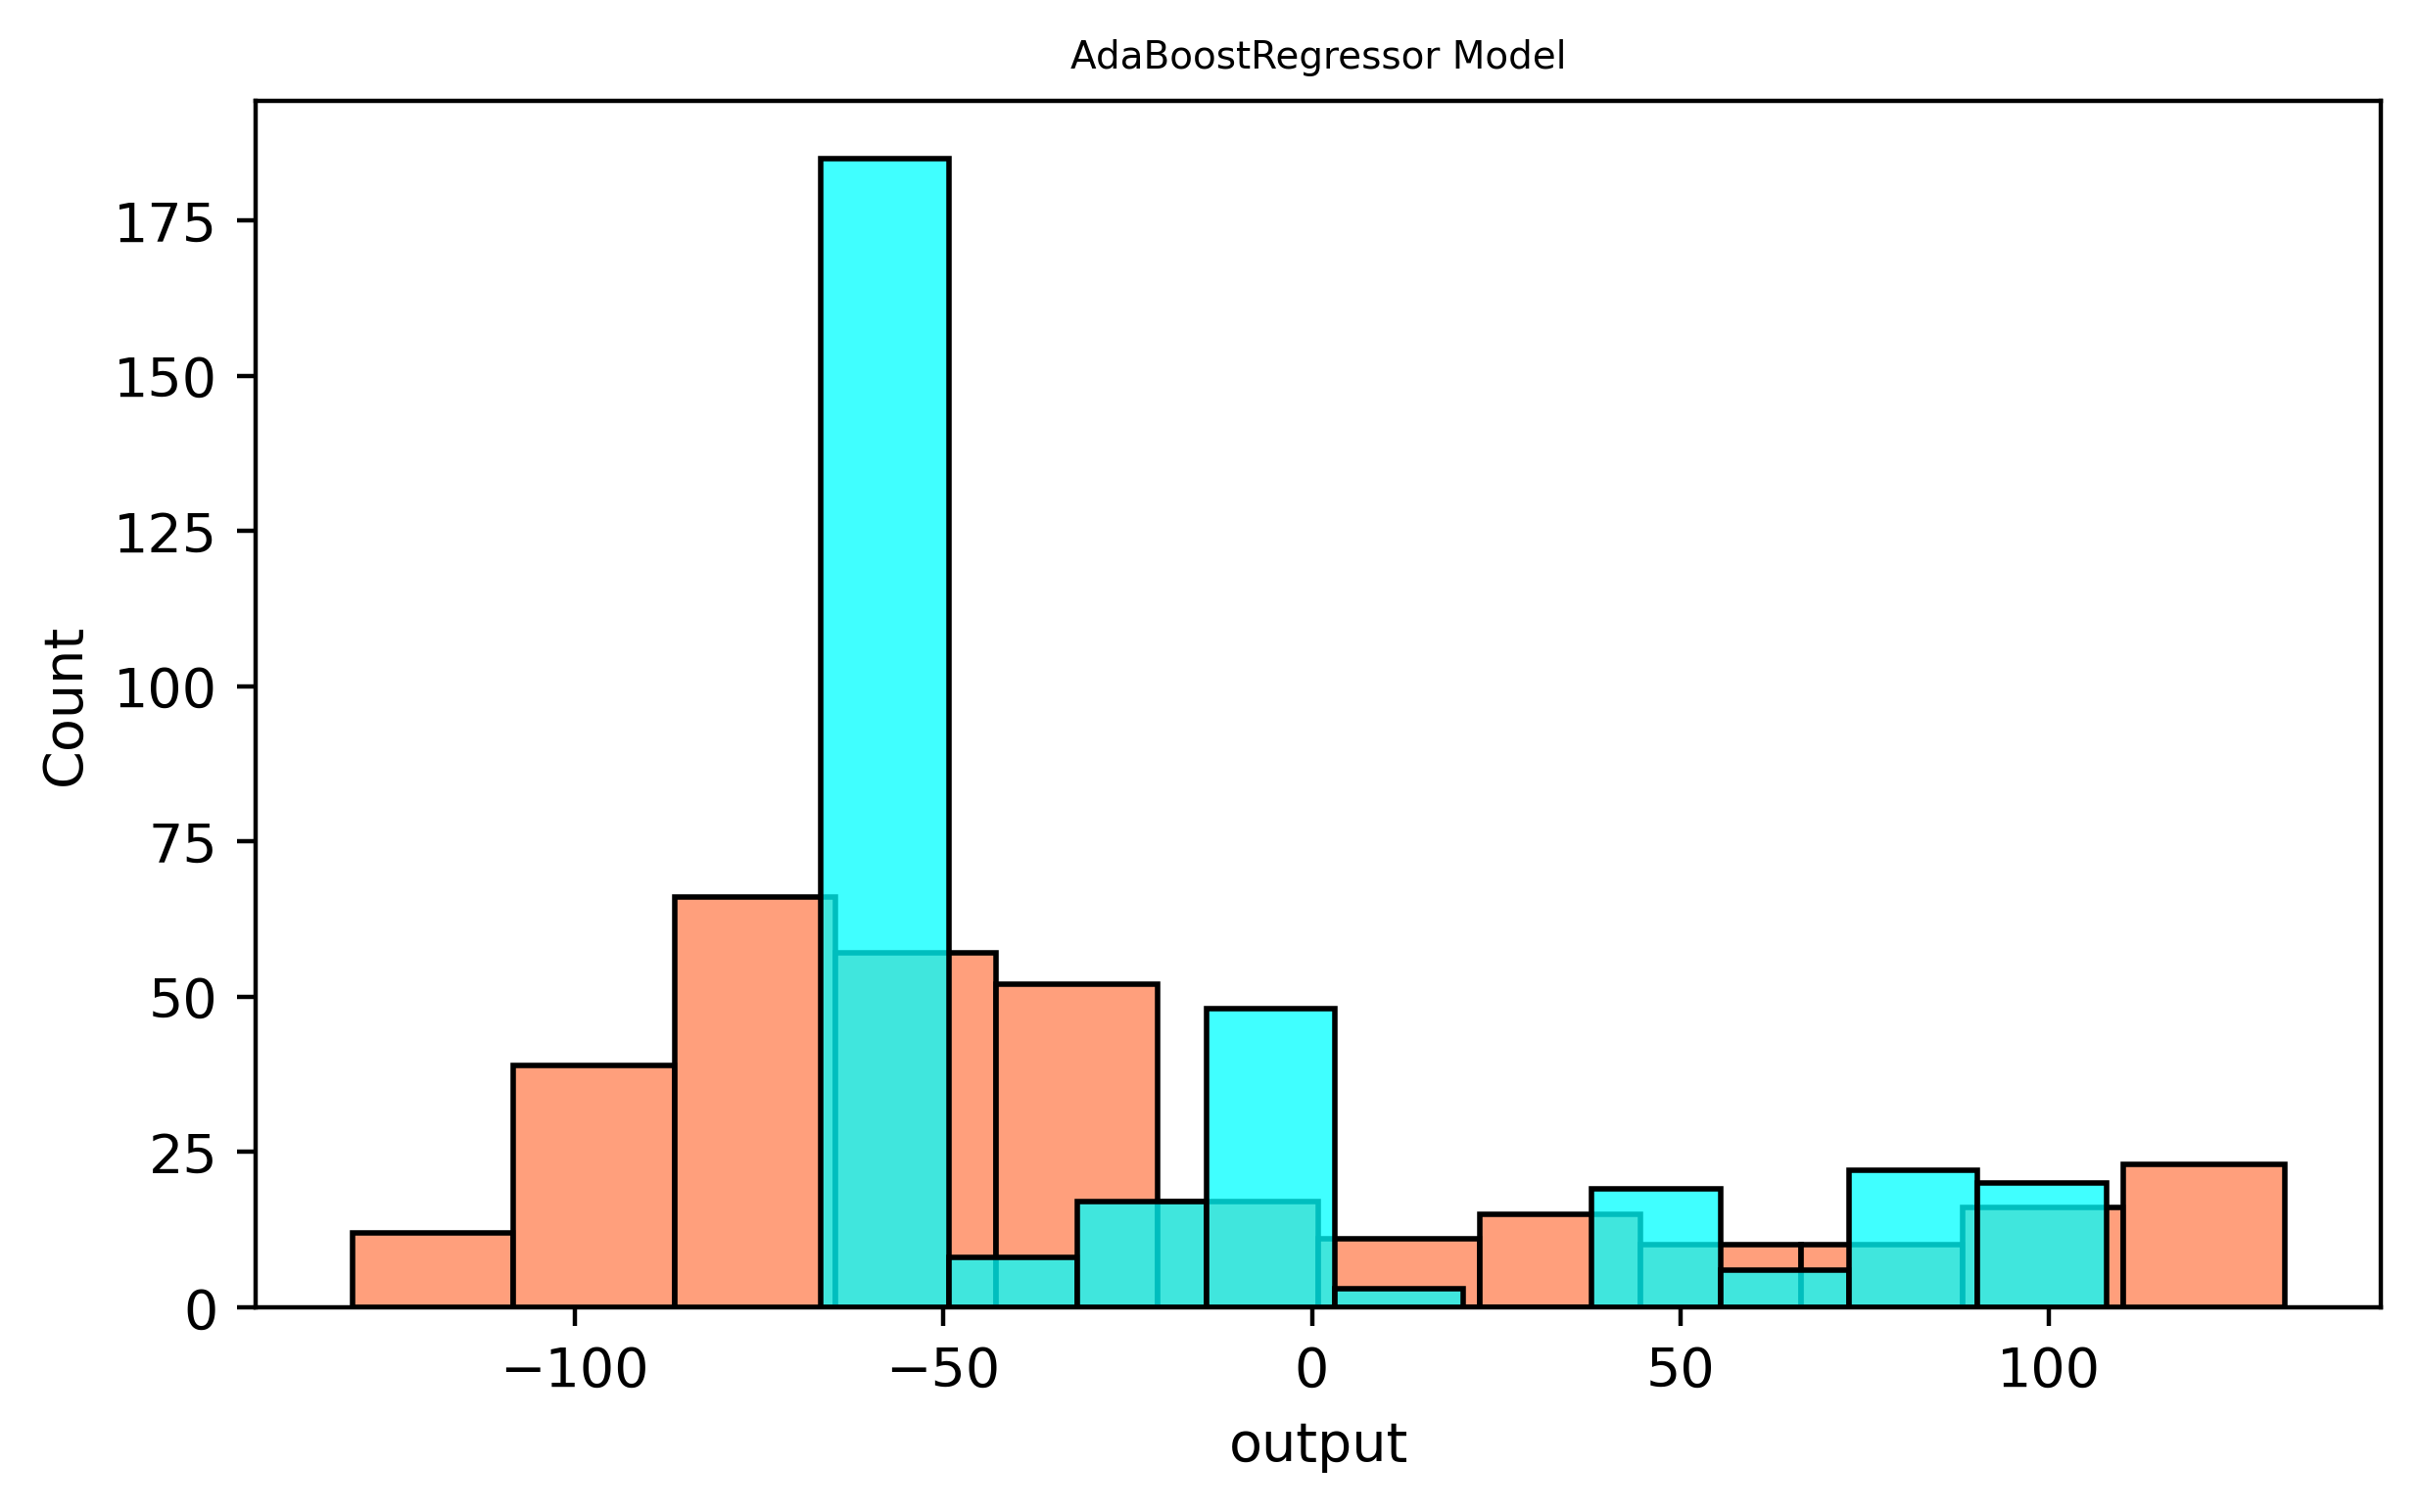

In [284]:
plt.figure(figsize=(7,4), dpi = 200)
plt.title('AdaBoostRegressor Model', fontsize = 7)
sns.histplot(y_test, color='coral')
sns.histplot(y_test_pre7, color='cyan'); # Visualization.

In [295]:
plt.figure(figsize=(17,17), dpi = 300)
plt.subplot(321)
plt.title('LInearRegression Model')
sns.histplot(y_test, color='blue', alpha=0.5)
sns.histplot(y_test_pre1, color='red', alpha=0.5)
plt.subplot(322)
plt.title('KNeighborsRegressor Model')
sns.histplot(y_test, color='blue', alpha=0.5)
sns.histplot(y_test_pre2, color='red', alpha=0.5)
plt.subplot(323)
plt.title('SupportVectorRegressor Model')
sns.histplot(y_test, color='blue', alpha=0.5)
sns.histplot(y_test_pre3, color='red', alpha=0.5)
plt.subplot(324)
plt.title('DecisionTreeRegressor Model')
sns.histplot(y_test, color='blue', alpha=0.5)
sns.histplot(y_test_pre4, color='red', alpha=0.5)
plt.subplot(325)
plt.title('RandomForestRegressor Model')
sns.histplot(y_test, color='blue', alpha=0.5)
sns.histplot(y_test_pre5, color='red', alpha=0.5)
plt.subplot(326)
plt.title('GradientBoostingRegressor Model')
sns.histplot(y_test, color='blue', alpha=0.5)
sns.histplot(y_test_pre6, color='red', alpha=0.5);


# Observations:

In [292]:
dict1 = {'Model':['LinearRegression','KNeighborsRegressor','SupportVectorRegressor','DecisionTreeRegressor','RandomForestRegressor','GradientBoostingRegressor', 'AdaBoostRegressor'],
                       'mean_absolute_error':[LI_REG,KN_REG,SVR,DT_REG,RF_REG,GBDT_REG, ADA_REG],
                            'R^2 (Coefficient of Determinate)': [LI_REG1,KN_REG1,SVR1,DT_REG1,RF_REG1,GBDT_REG1, ADA_REG1]}

In [293]:
df = pd.DataFrame(dict1)
df

,Model,mean_absolute_error,R^2 (Coefficient of Determinate)
0,LinearRegression,44.072035,0.275435
1,KNeighborsRegressor,23.416923,0.684480
2,SupportVectorRegressor,25.959900,0.636775
3,DecisionTreeRegressor,29.239069,0.477267
4,RandomForestRegressor,25.431191,0.612640
5,GradientBoostingRegressor,22.260335,0.663455
6,AdaBoostRegressor,27.545619,0.655428


# Conclusions

# Conclusion:
- As we can conclude that, The Model Generated by `GradientBoostingRegressor` Algorithem is the best `Model` for the input& output dataset (caseStudy)problem as a part of Hackathon compared to all other models.
- The Evaluation matric - mean_absolute_error of GBDT is low i.e., **`22.260335271658043`**, Thus it is clear that GBDT has the best performance of all models.
- The Outliers are not removed and not transformed ,the models had been generated and evaluation is done.

# BONUS STEPS:

* Proper outlier detection and treatment.
* Feature Engineering

In [305]:
hack = pd.read_csv(r"C:\Users\GUDLA RAGUWING\Data Science Course\Artificial Intelligence\hack.csv")

In [306]:
hack.drop(['Unnamed: 0'], axis = 1, inplace = True) # droping the column

In [307]:
hack

,input,output
0,-122.740667,-130.572085
1,-121.531419,-129.938929
2,-134.917019,-130.141832
3,-120.605951,-125.760932
4,-129.894781,-112.785214
...,...,...
1086,-119.954237,123.609122
1087,-109.942155,127.197394
1088,-111.515368,128.170885
1089,-110.344221,123.087950


In [308]:
# 1. IQR Method -- Numerical column (output)
Q1,Q2,Q3 = list(hack.output.quantile(q= [0.25,0.5,0.75]).values)
print(Q1,Q2,Q3, sep = ', ')

IQR = Q3-Q1
UP_LI = Q3+1.5*IQR
LO_LI = Q1-1.5*IQR

print(IQR, UP_LI,LO_LI, sep = ', ')

hack[(hack.output>UP_LI )| (hack.output<LO_LI)]# The following records are the outliers in our dataset.

-76.9885951, -46.30093846, 5.0754008045
82.0639959045, 128.17139466125, -200.08458895675


,input,output
354,120.589204,128.416416
358,133.101515,133.793116
359,124.633331,129.000000
361,133.024034,132.055270
471,105.705891,131.841595
473,129.541672,128.589413
475,133.358935,131.916362
478,108.413666,134.425495
1056,122.831827,129.434291
1060,99.683141,129.272153


0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
          ...   
1086    4.981386
1087    5.029129
1088    5.041926
1089    4.974375
1090         NaN
Name: output, Length: 1091, dtype: float64

<AxesSubplot: >

-1.0604091448640767

0.9233018088886171

,input,output,output_trans
0,-122.740667,-130.572085,NaN
1,-121.531419,-129.938929,NaN
2,-134.917019,-130.141832,NaN
3,-120.605951,-125.760932,NaN
4,-129.894781,-112.785214,NaN
...,...,...,...
1086,-119.954237,123.609122,4.981386
1087,-109.942155,127.197394,5.029129
1088,-111.515368,128.170885,5.041926
1089,-110.344221,123.087950,4.974375


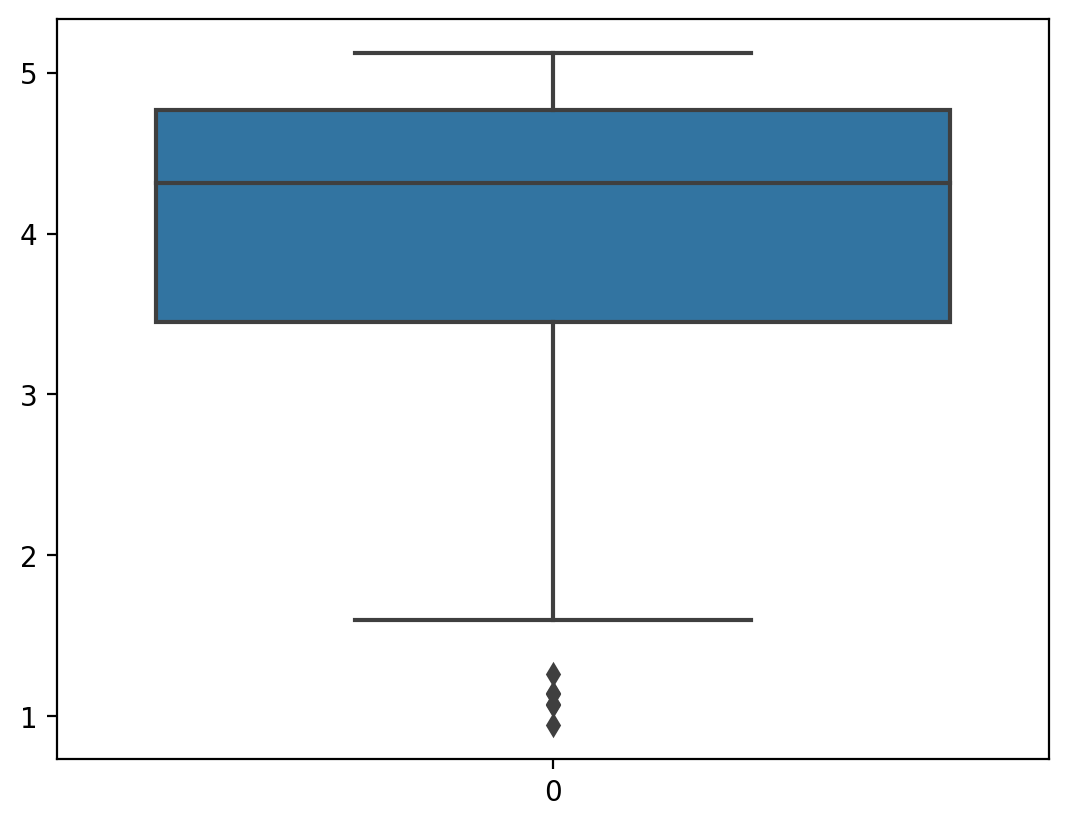

In [309]:
hack.output**(1/3)
sns.boxplot(hack.output**(1/3));

(hack.output**(1/3)).skew()
hack.output.skew()
hack['output_trans'] = hack.output**(1/3) # assigning the transformed to the dataset (Feature engineering)

hack

In [310]:
hack.output_trans.isna().sum()

810

In [311]:
hack.head()

,input,output,output_trans
0,-122.740667,-130.572085,NaN
1,-121.531419,-129.938929,NaN
2,-134.917019,-130.141832,NaN
3,-120.605951,-125.760932,NaN
4,-129.894781,-112.785214,NaN


#### Filling the missing values with median of the column

In [312]:
Median = hack.output_trans.median()

In [313]:
hack.output_trans.fillna(Median, inplace = True)

In [315]:
hack.output_trans.isna().sum()

0

In [317]:
hack.head()

,input,output,output_trans
0,-122.740667,-130.572085,4.314903
1,-121.531419,-129.938929,4.314903
2,-134.917019,-130.141832,4.314903
3,-120.605951,-125.760932,4.314903
4,-129.894781,-112.785214,4.314903


### Build a Linear Regression model by performing appropriate feature engineering.


In [318]:
X = hack[['input']]
y = hack['output_trans']

In [319]:
# splitting the historical data into train and test.

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.70, random_state=27)

In [320]:
print(X_train.shape, y_train.shape)

print(X_test.shape, y_test.shape)

(763, 1) (763,)
(328, 1) (328,)


### Data preparation on train data:

In [321]:
# scaling the numerical features on the Training Data
from sklearn.preprocessing import StandardScaler

Std_scaler = StandardScaler()

# feature names will be (annoyingly) lost after Scaling the data
# (i.e. the dataframe is converted to a numpy ndarray)

X_train_trns = pd.DataFrame(Std_scaler.fit_transform(X_train),
                                     columns = X_train.columns,
                                     index = X_train.index)
X_train_trns.head()

,input
601,0.311620
196,-0.074995
605,0.286270
643,0.121597
854,-1.754409


### Data preparation on test data:

In [322]:
X_test_trns = pd.DataFrame(Std_scaler.transform(X_test),
                                     columns = X_test.columns,
                                     index = X_test.index)
X_test_trns.head()

,input
1080,-1.665750
184,-0.377567
271,0.693561
283,0.932037
526,0.963914


In [323]:
from sklearn.linear_model import LinearRegression
regressor1 = LinearRegression()
regressor1.fit(X_train_trns, y_train) # Training the model and Building the model

y_test_pre1 = regressor1.predict(X_test_trns) # Prediction

from sklearn import metrics

print('Mean Squared Error: ', metrics.mean_squared_error(y_test, y_test_pre1))
print('Root Mean Squared Error: ', np.sqrt(metrics.mean_squared_error(y_test, y_test_pre1)))
print('Mean Absolute Error: ', metrics.mean_absolute_error(y_test, y_test_pre1))
print('R^2 (Coefficient of Determinate): ', metrics.r2_score(y_test, y_test_pre1))

LI_REG =  metrics.mean_absolute_error(y_test, y_test_pre1)
LI_REG1 =  metrics.r2_score(y_test, y_test_pre1)
# Evaluating the model using the Evaluation metrics

LinearRegression()

Mean Squared Error:  0.2466225192901305
Root Mean Squared Error:  0.4966110342009433
Mean Absolute Error:  0.26897494584908116
R^2 (Coefficient of Determinate):  0.038687529500115


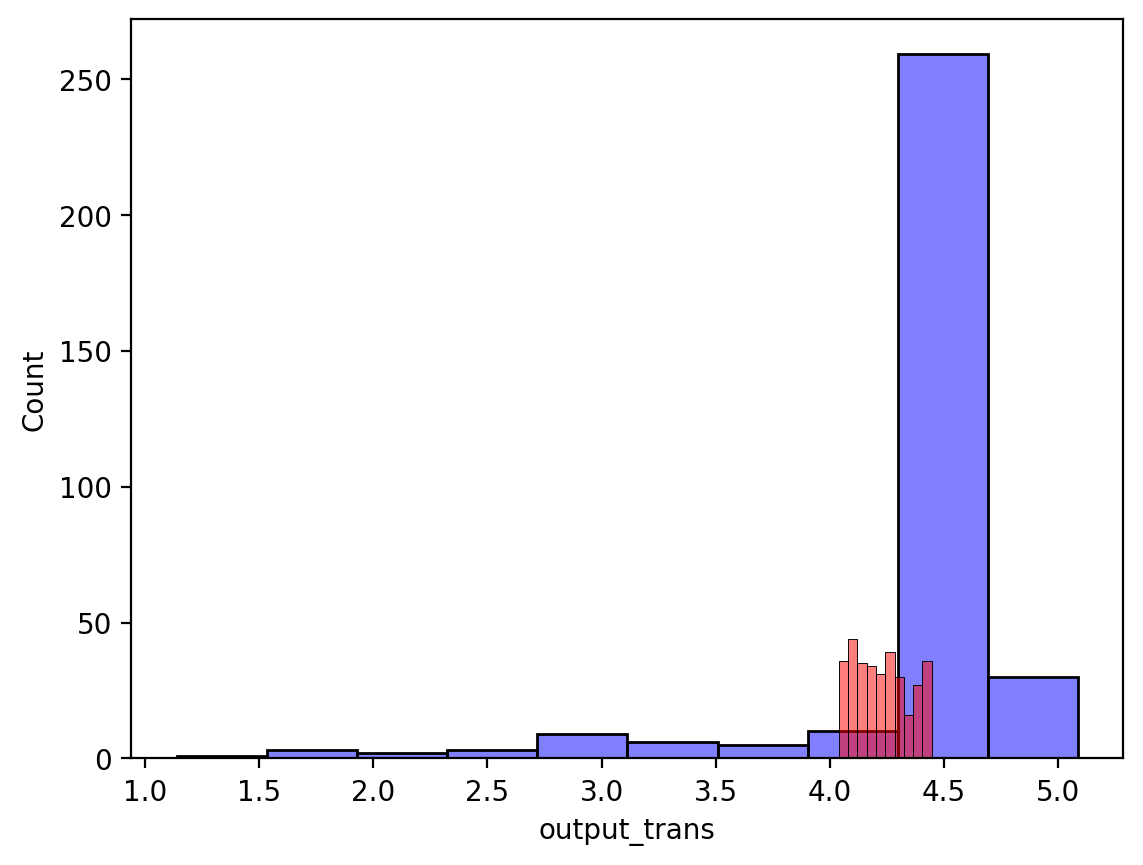

In [324]:
sns.histplot(y_test, color='blue', alpha=0.5)
sns.histplot(y_test_pre1, color='red', alpha=0.5); # Visualizing the model performance 

# Observation:

- As we can observe that, The Model Generated by `LinearRegression` Algorithem  for the input& output dataset is giving The Evaluation matric - mean_absolute_error of GBDT is low i.e., **`0.26897494584908116`**, which is almost equal to 0.
- The Outliers are not removed and they are transformed using the feature engineering techniques,the model had been generated and evaluation is done.